## Простроение гистограммы распределения

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#загрузка данных
lps=loadtxt('lps')
%whos

Variable   Type       Data/Info
-------------------------------
lps        ndarray    45x2: 90 elems, type `float64`, 720 bytes


Берем значения из второй колонки и строим гистограмму распределения с помощью соответствующей функции `hist`.

(array([  9.,   6.,  15.,   8.,   2.,   3.,   0.,   0.,   1.,   1.]),
 array([ 0.282 ,  0.3236,  0.3652,  0.4068,  0.4484,  0.49  ,  0.5316,
         0.5732,  0.6148,  0.6564,  0.698 ]),
 <a list of 10 Patch objects>)

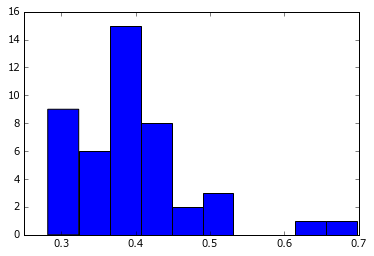

In [3]:
vv=lps[:,1]
hist(vv)

По информации, возвращаемой функцией `hist`, ясно, что значения были разделены на 10 групп.
По оси ординат отложено количество значений в каждой группе.

Чтобы не гадать, что за информация возращается функцией `hist`, обратимся к документации.

In [4]:
hist?

Важный параметр - `bins` (корзинки, ячейки, ящички) - определенное число заданных интервалов, попадание в которые подсчитывается для всех значений. Можно задать в штуках, а можно в виде перечня границ. Интервалы обычно делают одинаковой ширины, хотя это не обязательно.

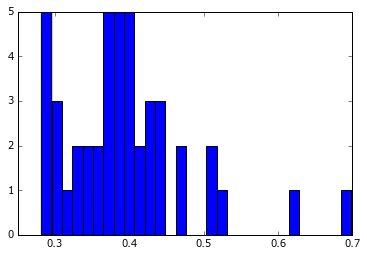

In [5]:
hist(vv, bins=30);

Количество/ширину интервалов обычно подбирают на глаз. Поскольку обычно стоит задача оценить форму распределения, то автоматические методы подбора "оптимального" количества классов опираются на характеристики распределения - *моменты распределения*:
1. Среднее (mean)
2. Дисперсия (variance, вариация)
3. Асимметричность (skewness, скошенность, неравенство хвостов)
4. Эксцесс (kurtosis, тяжесть хвостов)

In [6]:
from scipy.stats import kurtosis, skew

sturges = lambda data: int(log2(len(data)) + 1)
rice = lambda data: int(2*len(data)**0.333)
doane = lambda data: int(1 + log(len(data)) + log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

sturges(vv), rice(vv), doane(vv)

(6, 7, 6)

Ссылки на описания методов.

- Sturges, H.A. (1926). "The choice of a class interval". Journal of the American Statistical Association: 65–66. doi:10.1080/01621459.1926.10502161.

- Lane D.M. (2007) http://onlinestatbook.com/2/graphing_distributions/histograms.html

- Doane D.P. (1976) Aesthetic frequency classiﬁcation. American Statistician, 30: 181–183

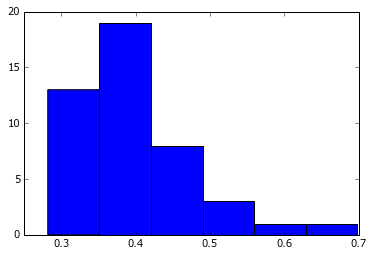

In [7]:
hist(vv, bins=6);

Другой полезный параметр - `normed`, который позволяет нормировать высоту столбцов в процентах к общему числу данных.

В результате получается эмпирическая плотность вероятности, т.е. чем выше столбик в этом месте диапазона, тем больше вероятность, что значения попадают в данный интервал.

В этой же шкале мы можем наложить теоретическое нормальное распределение (и любое другое).

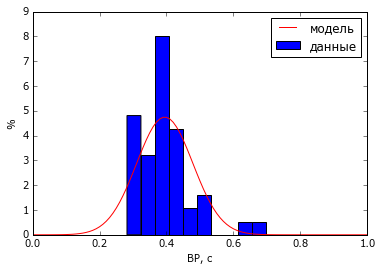

In [11]:
hist(vv, normed=True, label='данные')

#найдем характеристики распределения (предположительно нормального)
M=mean(vv); S=std(vv);
xx=frange(0,1,0.01) #подробные значения абсцисс для гладкой кривой
yy=normpdf(xx, M,S)
plot(xx,yy,'r-', label='модель'); legend(); xlabel('ВР, с'); ylabel('%');

Пример применения стиля к той же гистограмме.

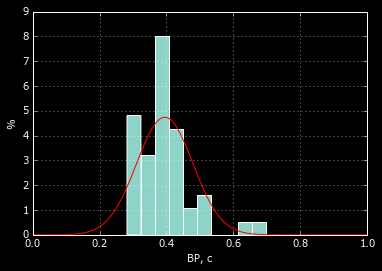

In [12]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    hist(vv, normed=True)
    grid(ls=':')

    M=mean(vv); S=std(vv);
    xx=frange(0,1,0.01) #подробные значения абсцисс для гладкой кривой
    yy=normpdf(xx, M,S)
    plot(xx,yy,'r-');xlabel('ВР, с'); ylabel('%');